In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
import pandas as pd
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import cv2
from keras.models import Sequential, load_model
from keras.utils import to_categorical
tf.__version__

'2.4.1'

In [2]:
df_train = pd.read_pickle("./train_data.pkl")
df_train.shape

(5216, 2)

In [3]:
df_valid = pd.read_pickle("./valid_data.pkl")
print('df_valid: ',df_valid.shape)
df_test = pd.read_pickle("./test_data.pkl")
print('df_test: ',df_test.shape)

df_valid:  (16, 2)
df_test:  (624, 2)


In [4]:
df_train.head()

,label,matrix
0,0,"[[61, 63, 69, 75, 86, 85, 92, 89, 93, 96, 93, ..."
1,1,"[[51, 53, 52, 52, 57, 55, 60, 61, 62, 62, 60, ..."
2,1,"[[19, 20, 22, 27, 28, 30, 36, 40, 42, 46, 50, ..."
3,0,"[[12, 12, 13, 13, 15, 14, 15, 16, 15, 12, 16, ..."
4,1,"[[3, 3, 3, 2, 4, 13, 23, 25, 32, 43, 66, 64, 7..."


In [5]:
[df_train.iloc[i,1].shape for i in range(df_train.shape[0])]

[(224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224, 3),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224, 3),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224, 3),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224, 3),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224, 3),
 (224, 224),
 (224, 224

In [9]:
df_train['shape'] = df_train['matrix'].apply(lambda x: len(x.shape))

In [10]:
df_train.head()

,label,matrix,shape
0,0,"[[61, 63, 69, 75, 86, 85, 92, 89, 93, 96, 93, ...",2
1,1,"[[51, 53, 52, 52, 57, 55, 60, 61, 62, 62, 60, ...",2
2,1,"[[19, 20, 22, 27, 28, 30, 36, 40, 42, 46, 50, ...",2
3,0,"[[12, 12, 13, 13, 15, 14, 15, 16, 15, 12, 16, ...",2
4,1,"[[3, 3, 3, 2, 4, 13, 23, 25, 32, 43, 66, 64, 7...",2


In [11]:
df_train['shape'].value_counts()

2    4933
3     283
Name: shape, dtype: int64

In [27]:
x = df_train[df_train['shape'] ==3].iloc[0,1]

In [31]:
x.T[0].T.shape

(224, 224)

In [32]:
df_train.loc[df_train['shape'] ==3, 'matrix'] = df_train['matrix'].apply(lambda x: x.T[0].T)

In [36]:
[df_train.iloc[i,1].shape for i in range(df_train.shape[0])]

[(224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),

In [39]:
X_train = df_train['matrix'].values
X_train.shape

(5216,)

In [41]:
X_train = np.array([X_train[i] for i in range(X_train.shape[0])])/255.
X_train.shape

(5216, 224, 224)

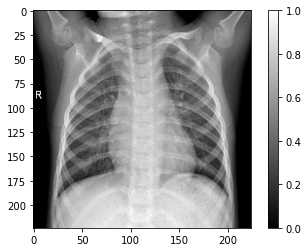

In [60]:
plt.figure()
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.colorbar()
plt.grid(False)
plt.show()

In [45]:
[df_valid.iloc[i,1].shape for i in range(df_valid.shape[0])]

[(224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224)]

In [46]:
[df_test.iloc[i,1].shape for i in range(df_test.shape[0])]

[(224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),
 (224, 224),

In [48]:
X_valid = df_valid['matrix'].values
X_valid = np.array([X_valid[i] for i in range(X_valid.shape[0])])/255.
X_valid.shape

(16, 224, 224)

In [49]:
X_test = df_test['matrix'].values
X_test = np.array([X_test[i] for i in range(X_test.shape[0])])/255.
X_test.shape

(624, 224, 224)

In [63]:
X_train.shape

(5216, 224, 224)

In [68]:
num_classes = 2

model_dense = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape = X_train.shape[1:]),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation="softmax")])

In [69]:
model_dense.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 401416    
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 10        
Total params: 401,462
Trainable params: 401,462
Non-trainable params: 0
_________________________________________________________________


In [58]:
y_train = df_train.label.values
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_train.shape

(5216, 2)

In [61]:
y_valid = df_valid.label.values
y_valid.shape

(16,)

In [62]:
y_test = df_test.label.values
y_test.shape

(624,)

In [71]:
batch_size = 128
epochs = 1_00
model_dense.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [72]:
history = model_dense.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/100
37/37 [==============================] - 2s 33ms/step - loss: 1.3991 - accuracy: 0.2422 - val_loss: 0.8722 - val_accuracy: 0.2644
Epoch 2/100
37/37 [==============================] - 1s 26ms/step - loss: 0.7655 - accuracy: 0.2711 - val_loss: 0.6886 - val_accuracy: 0.6724
Epoch 3/100
37/37 [==============================] - 1s 26ms/step - loss: 0.6888 - accuracy: 0.5714 - val_loss: 0.6540 - val_accuracy: 0.7989
Epoch 4/100
37/37 [==============================] - 1s 25ms/step - loss: 0.6559 - accuracy: 0.7684 - val_loss: 0.6569 - val_accuracy: 0.7356
Epoch 5/100
37/37 [==============================] - 1s 26ms/step - loss: 0.6362 - accuracy: 0.8010 - val_loss: 0.5748 - val_accuracy: 0.8123
Epoch 6/100
37/37 [==============================] - 1s 26ms/step - loss: 0.5522 - accuracy: 0.8869 - val_loss: 0.5234 - val_accuracy: 0.9272
Epoch 7/100
37/37 [==============================] - 1s 27ms/step - loss: 0.5139 - accuracy: 0.9071 - val_loss: 0.4881 - val_accuracy: 0.9100
Epoch 

In [73]:
model.save("model_dense")
np.save('model_dense_history.npy',history.history)

INFO:tensorflow:Assets written to: model_dense\assets


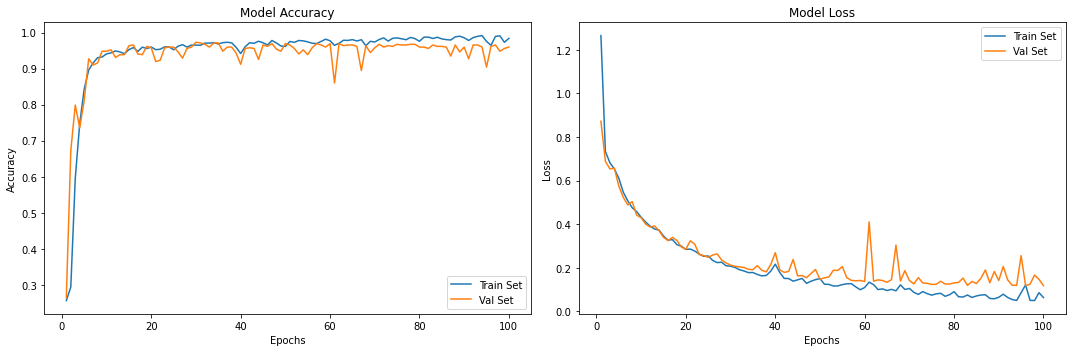

In [74]:
# plot model performance
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

In [75]:
load_history=np.load('model_dense_history.npy',allow_pickle='TRUE').item()
reconstructed_model = load_model("model_dense")
reconstructed_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 8)                 401416    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 18        
Total params: 401,434
Trainable params: 401,434
Non-trainable params: 0
_________________________________________________________________


In [86]:
prob_predictions = reconstructed_model.predict(X_test)
predictions = [np.argmax(prob_predictions[i]) for i in range(X_test.shape[0])]

y_test = df_test.label.values

# validate on test set
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 67 167]
 [  3 387]]
              precision    recall  f1-score   support

           0       0.96      0.29      0.44       234
           1       0.70      0.99      0.82       390

    accuracy                           0.73       624
   macro avg       0.83      0.64      0.63       624
weighted avg       0.80      0.73      0.68       624



In [87]:
df_test.label.value_counts()

1    390
0    234
Name: label, dtype: int64